# EDA: entries.json

In [1]:
import sys
sys.path.append("../")

import numpy as np
from matplotlib import pyplot as plt
from components.utils import read_json, parse_datetime

plt.style.use("seaborn-v0_8-paper")
plt.style.use("dark_background")
plt.rcParams["grid.color"] = (.5, .5, .5, .2)

In [2]:
entries = read_json("../data/entries.json")
entries.head()

,_id,noise,sysTime,device,dateString,rssi,date,sgv,direction,unfiltered,filtered,type,utcOffset,scale,slope,intercept,mbg,trend,trendRate,isCalibration
0,1670830457083e714d391d71,1.0,2022-12-12T07:34:17.000Z,DEXCOM52,2022-12-12T07:34:17.000Z,100.0,1.670830e+12,156.0,Flat,171020.0,171972.0,sgv,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1670829857504d574c2e41ad,1.0,2022-12-12T07:24:17.000Z,DEXCOM52,2022-12-12T07:24:17.000Z,100.0,1.670830e+12,157.0,FortyFiveDown,171156.0,176902.0,sgv,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16708289569215b8b9471a93,1.0,2022-12-12T07:09:16.000Z,DEXCOM52,2022-12-12T07:09:16.000Z,100.0,1.670829e+12,166.0,Flat,179554.0,181458.0,sgv,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1670829555675af8d53dbbc6,1.0,2022-12-12T07:19:15.000Z,DEXCOM52,2022-12-12T07:19:15.000Z,100.0,1.670830e+12,163.0,Flat,176868.0,178942.0,sgv,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1670828657589b6156405dda,1.0,2022-12-12T07:04:17.000Z,DEXCOM52,2022-12-12T07:04:17.000Z,100.0,1.670829e+12,167.0,Flat,180642.0,180642.0,sgv,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88758 entries, 0 to 88757
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            88758 non-null  object 
 1   noise          67996 non-null  float64
 2   sysTime        88758 non-null  object 
 3   device         88758 non-null  object 
 4   dateString     88758 non-null  object 
 5   rssi           47288 non-null  float64
 6   date           88758 non-null  float64
 7   sgv            88539 non-null  float64
 8   direction      88539 non-null  object 
 9   unfiltered     67996 non-null  float64
 10  filtered       67996 non-null  float64
 11  type           88758 non-null  object 
 12  utcOffset      88758 non-null  int64  
 13  scale          164 non-null    float64
 14  slope          164 non-null    float64
 15  intercept      164 non-null    float64
 16  mbg            55 non-null     float64
 17  trend          20543 non-null  float64
 18  trendR

In [4]:
# percentage of missing entries
entries_missing = entries.isna().sum() / entries.isna().count()
entries_missing.columns = "% missing"
entries_missing.sort_values(ascending=False)

trendRate        0.999932
mbg              0.999380
intercept        0.998152
slope            0.998152
scale            0.998152
isCalibration    0.768550
trend            0.768550
rssi             0.467225
noise            0.233917
filtered         0.233917
unfiltered       0.233917
direction        0.002467
sgv              0.002467
type             0.000000
utcOffset        0.000000
date             0.000000
dateString       0.000000
device           0.000000
sysTime          0.000000
_id              0.000000
dtype: float64

In [5]:
entries.describe()

,noise,rssi,date,sgv,unfiltered,filtered,utcOffset,scale,slope,intercept,mbg,trend,trendRate
count,67996.000000,47288.0,8.875800e+04,88539.000000,67996.000000,67996.000000,88758.0,164.0,164.000000,164.000000,55.000000,20543.000000,6.0
mean,1.267898,100.0,1.685838e+12,163.320745,186747.606300,186745.209968,0.0,1.0,914.254796,37207.918848,144.168714,3.988755,0.0
std,0.673754,0.0,8.762098e+09,59.123256,58583.818661,58371.339551,0.0,0.0,107.160878,41803.300262,31.834217,0.774949,0.0
min,1.000000,100.0,1.670829e+12,38.000000,34.000000,34.000000,0.0,1.0,0.000000,-128832.460000,91.891892,1.000000,0.0
25%,1.000000,100.0,1.677871e+12,124.000000,147968.000000,147877.750000,0.0,1.0,908.807513,16553.122320,116.216216,4.000000,0.0
50%,1.000000,100.0,1.684787e+12,156.000000,180948.000000,180880.000000,0.0,1.0,925.925926,33359.128422,147.747748,4.000000,0.0
75%,1.000000,100.0,1.694215e+12,198.000000,221442.000000,221408.000000,0.0,1.0,925.925926,51291.392647,162.162162,4.000000,0.0
max,4.000000,100.0,1.697710e+12,400.000000,579428.000000,477522.000000,0.0,1.0,1155.356830,232029.269722,228.828829,7.000000,0.0


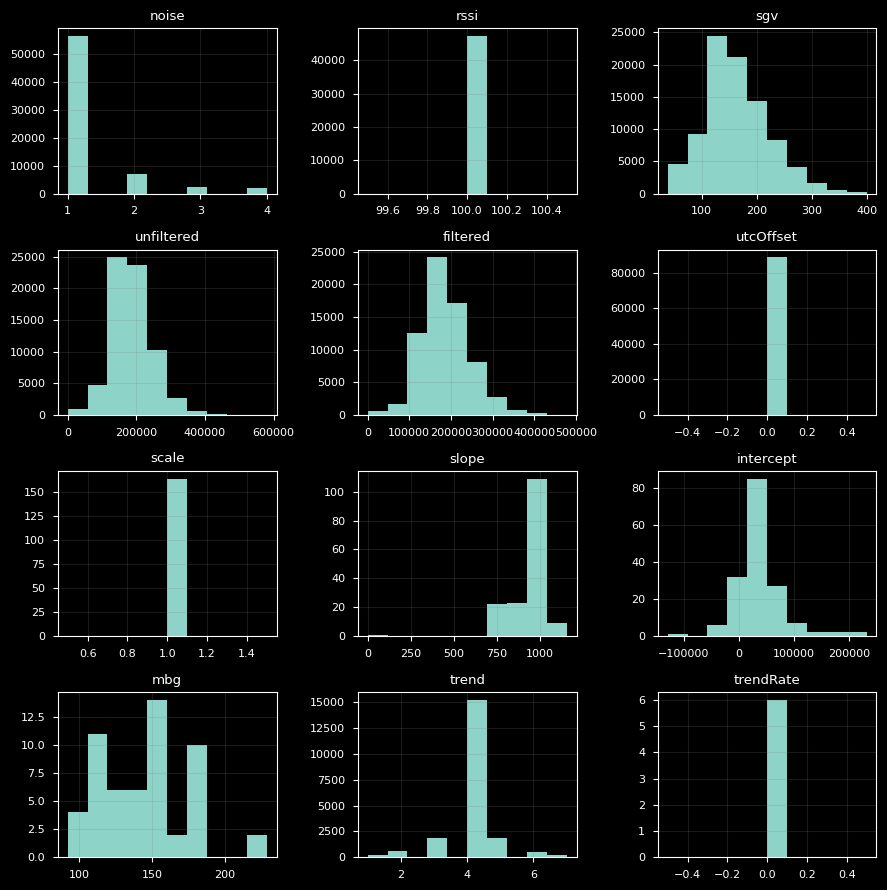

In [6]:
num_cols = [
    col for col in entries.columns 
    if entries[col].dtype != "O" and col != "date"
]

entries[num_cols].hist(figsize=(9, 9))
plt.tight_layout()
plt.grid(alpha=.2)

In [7]:
entries.describe(include="O").T

,count,unique,top,freq
_id,88758,88758,1670830457083e714d391d71,1
sysTime,88758,88701,2023-09-12T05:46:38.131Z,2
device,88758,5,DEXCOM52,40447
dateString,88758,88701,2023-09-12T05:46:38.131Z,2
direction,88539,9,Flat,60635
type,88758,3,sgv,88539
isCalibration,20543,1,False,20543


In [8]:
entries["type"].value_counts(normalize=True)

type
sgv    0.997533
cal    0.001848
mbg    0.000620
Name: proportion, dtype: float64

In [9]:
entries["device"].value_counts(normalize=True)

device
DEXCOM52                             0.455700
DexcomBH                             0.234548
loop://iPhone                        0.231382
DEXCOMBH                             0.078303
loop://LoopKit/MockCGMManager/1.0    0.000068
Name: proportion, dtype: float64

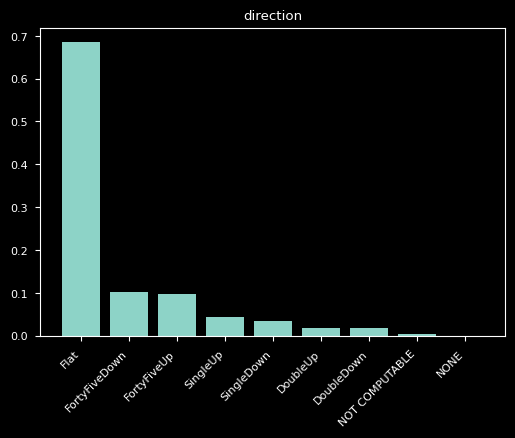

In [10]:
value_counts = entries["direction"].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
plt.bar(value_counts.index, value_counts.values)
plt.title("direction")
plt.xticks(value_counts.index, rotation=45, ha="right");

In [11]:
dt_cols = ["sysTime", "dateString"]
for col in dt_cols:
    entries[col] = parse_datetime(entries[col])

# number of unmatched dates
np.sum(entries["sysTime"] != entries["dateString"])

0

In [12]:
entries["sysTime"].min(), entries["sysTime"].max(), entries["sysTime"].dt.month.unique()

(Timestamp('2022-12-12 07:04:00'),
 Timestamp('2023-10-19 10:10:00'),
 array([12,  1,  2,  3,  4,  5,  6,  8,  9, 10], dtype=int32))